In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('Regional.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(42, 9)
(42, 9)


In [4]:
import pandas as pd

df = pd.read_csv('Regional.csv', encoding='latin-1')
print(df.shape)
df = df.head(500)
print(df.shape)


(42, 9)
(42, 9)


In [6]:
example = df['Review Title'][34]
print(example)


Cute Shirt, not great


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Cute', 'Shirt', ',', 'not', 'great']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Cute', 'NNP'), ('Shirt', 'NNP'), (',', ','), ('not', 'RB'), ('great', 'JJ')]

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores(example)

{'neg': 0.397, 'neu': 0.241, 'pos': 0.362, 'compound': -0.0757}

In [11]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review Title'])
    myid = str(row['Id'])
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/42 [00:00<?, ?it/s]

KeyError: 'Id'

In [12]:
print(df.columns)


Index(['ï»¿Id', 'ASIN', 'Rating', 'Review Title', 'Review', 'Product Name',
       'Brand', 'Category', 'Outfit type'],
      dtype='object')


In [13]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review Title'])
    myid = str(row['ï»¿Id'])
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/42 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ï»¿Id'})

# Convert the 'Id' column to float64 type in the 'vaders' DataFrame
vaders['ï»¿Id'] = vaders['ï»¿Id'].astype(float)

# Convert the 'Id' column to float64 type in the 'df' DataFrame
df['ï»¿Id'] = df['ï»¿Id'].astype(float)

# Merge the DataFrames
vaders = pd.concat([vaders, df], axis=1)


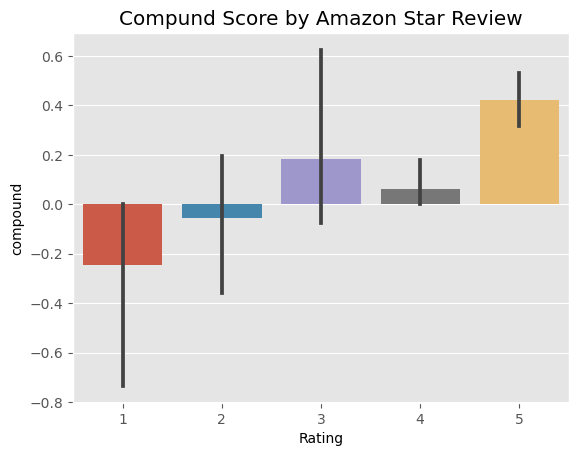

In [17]:
    ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

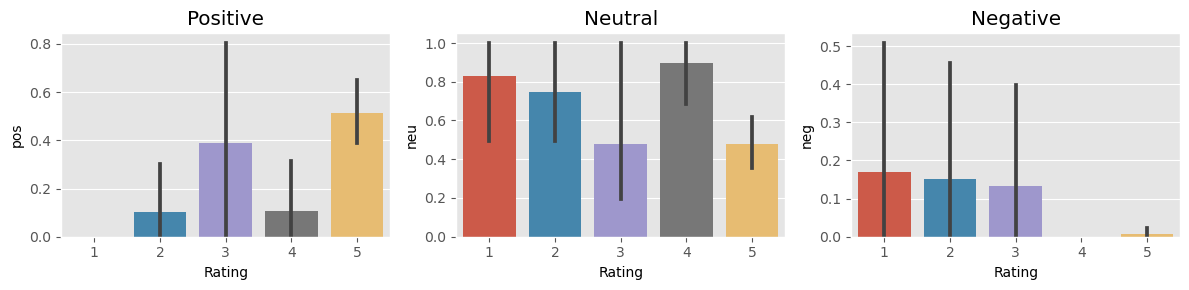

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()